# **Read Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/udara_jakarta_2021-2024.csv')
df

,pm10,pm25,so2,co,o3,no2,categori
0,59,79,21,26,15,31,2
1,30,46,21,14,16,24,3
2,23,33,19,11,14,19,3
3,36,53,23,14,12,24,2
4,29,36,20,14,12,21,3
...,...,...,...,...,...,...,...
4147,52,91,36,19,44,16,2
4148,55,104,34,20,54,14,1
4149,44,94,34,20,46,15,2
4150,53,102,33,21,39,19,1


In [ ]:
df.describe()

,pm10,pm25,so2,co,o3,no2,categori
count,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000
mean,53.936898,77.222784,38.995183,13.167148,30.591763,21.849229,1.932803
std,15.148184,23.129952,13.717895,6.538989,17.432674,12.397550,0.458925
min,3.000000,10.000000,2.000000,1.000000,3.000000,0.000000,0.000000
25%,45.000000,62.000000,27.000000,9.000000,19.000000,13.000000,2.000000
50%,55.000000,77.000000,41.000000,12.000000,27.000000,20.000000,2.000000
75%,64.000000,91.000000,51.000000,16.000000,37.000000,28.000000,2.000000
max,179.000000,287.000000,89.000000,70.000000,181.000000,202.000000,3.000000


In [ ]:
df.isnull().sum()

,0
pm10,0
pm25,0
so2,0
co,0
o3,0
no2,0
categori,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4152 entries, 0 to 4151
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   pm10      4152 non-null   int64
 1   pm25      4152 non-null   int64
 2   so2       4152 non-null   int64
 3   co        4152 non-null   int64
 4   o3        4152 non-null   int64
 5   no2       4152 non-null   int64
 6   categori  4152 non-null   int64
dtypes: int64(7)
memory usage: 227.2 KB


# **Exploratory Data Analysis**

<ipython-input-7-caf51e421688>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item.index, y=item.values, palette='cividis')


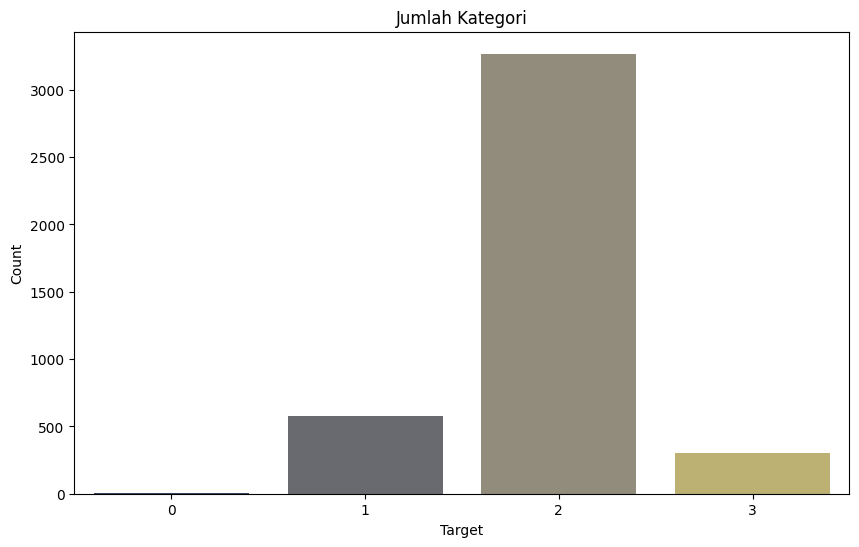

In [ ]:
# Create the barplot
item = df['categori'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=item.index, y=item.values, palette='cividis')
plt.title('Jumlah Kategori')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [ ]:
df['categori'].value_counts()

,count
categori,
2,3268
1,577
3,304
0,3


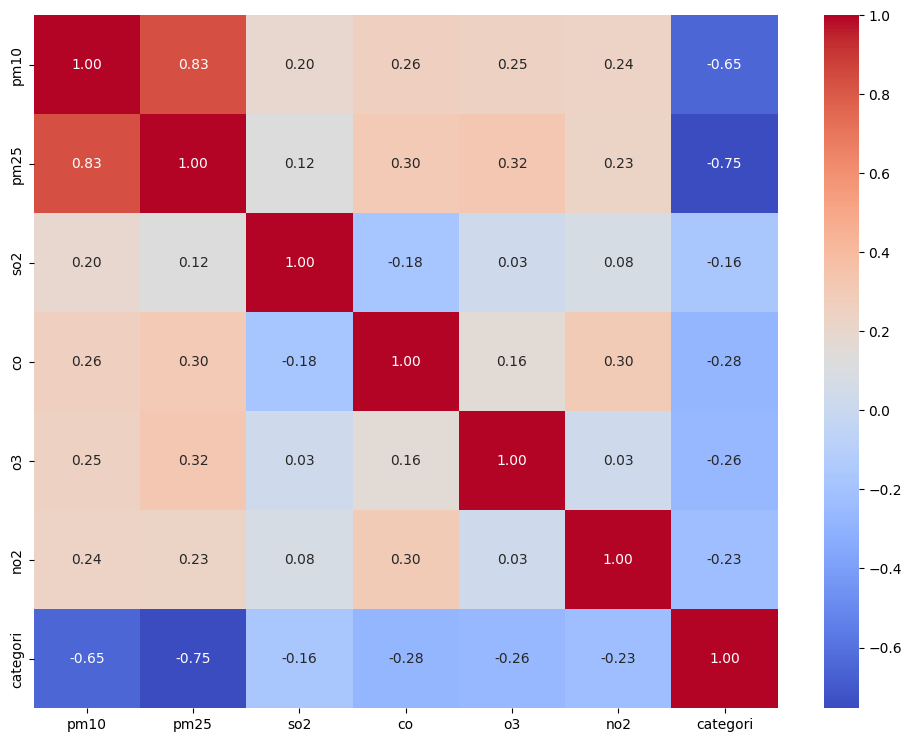

In [ ]:
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

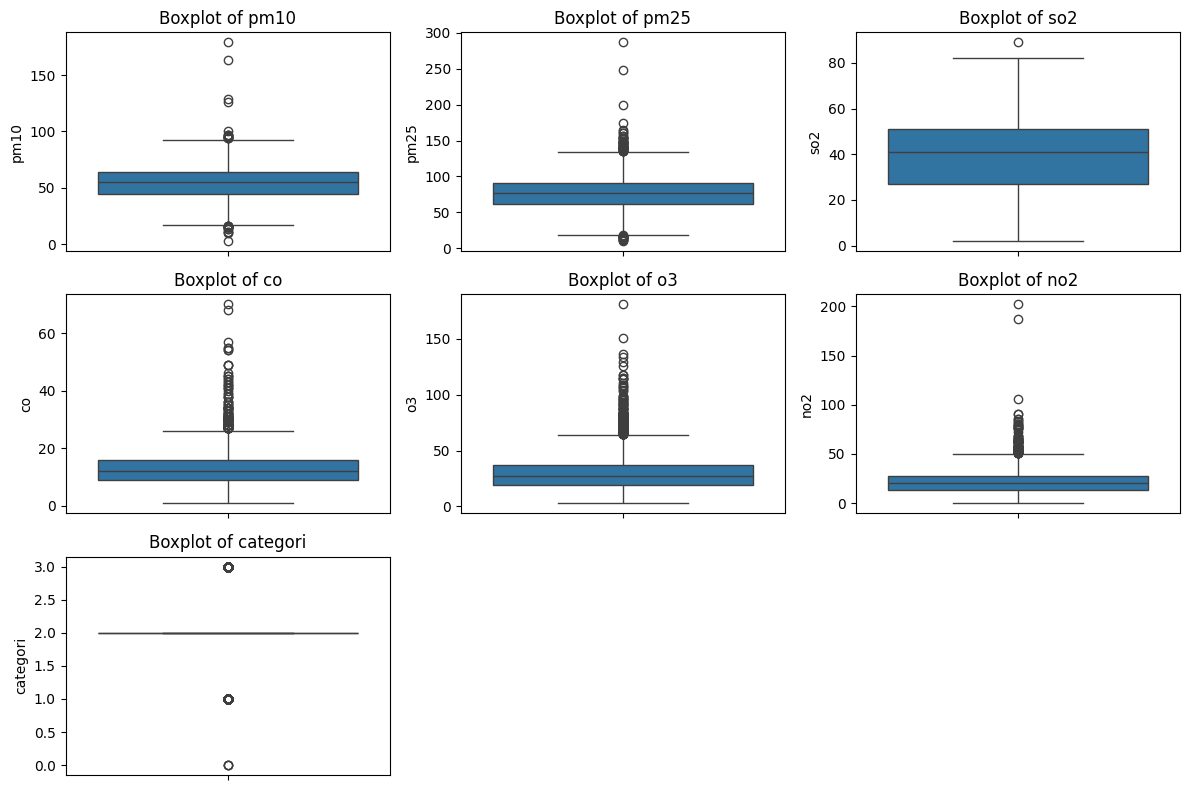

In [ ]:
# Boxplot
plt.figure(figsize=(12, 8))
for i, col in enumerate(df, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

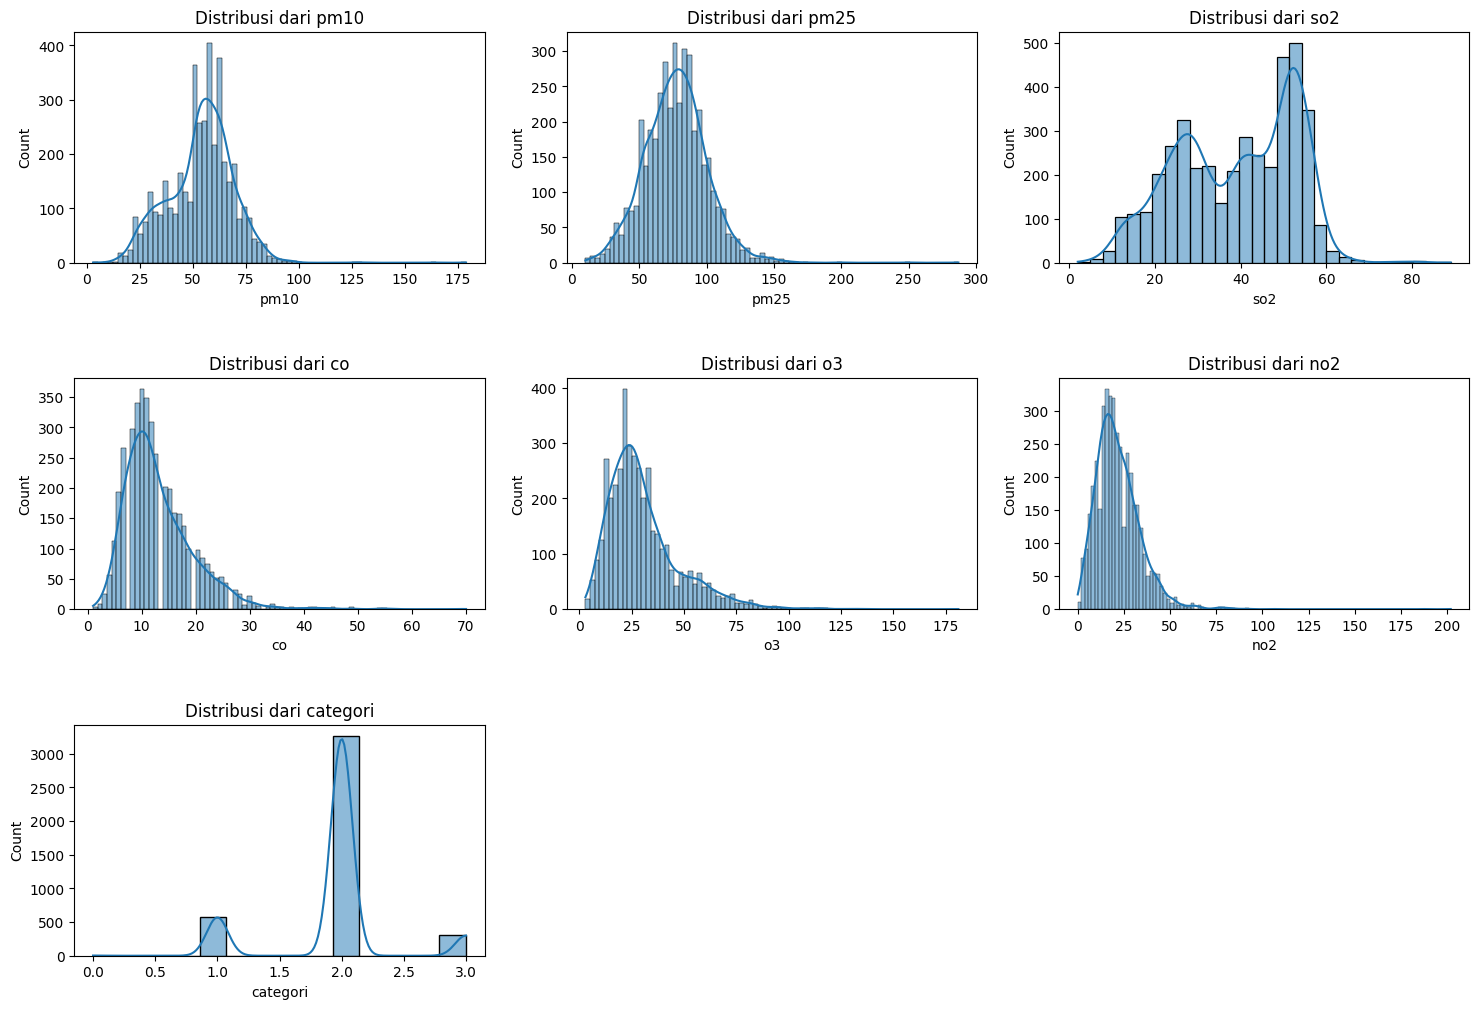

In [ ]:
# Distribusi
plt.figure(figsize=(18, 12))
plt.subplots_adjust(hspace=0.5)
for i, var in enumerate(df, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribusi dari {var}')
plt.show()

In [ ]:
X = df.drop(['categori'], axis = 1)
y = df['categori']

In [ ]:
y.value_counts()

,count
categori,
2,3268
1,577
3,304
0,3


# **Pre-Processing Build Model**

In [ ]:
!pip install feature-engine
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats.mstats import winsorize
from feature_engine.outliers import Winsorizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.1/364.1 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 62.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.2.3 which is incompatible.


In [ ]:
# SMOTEENN
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
# SMOTEENN
smote = SMOTE(sampling_strategy='auto', k_neighbors=2, random_state=42)
smoteenn = SMOTEENN(smote=smote, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
y_resampled.value_counts()

,count
categori,
2,3268
3,3268
1,3268
0,3268


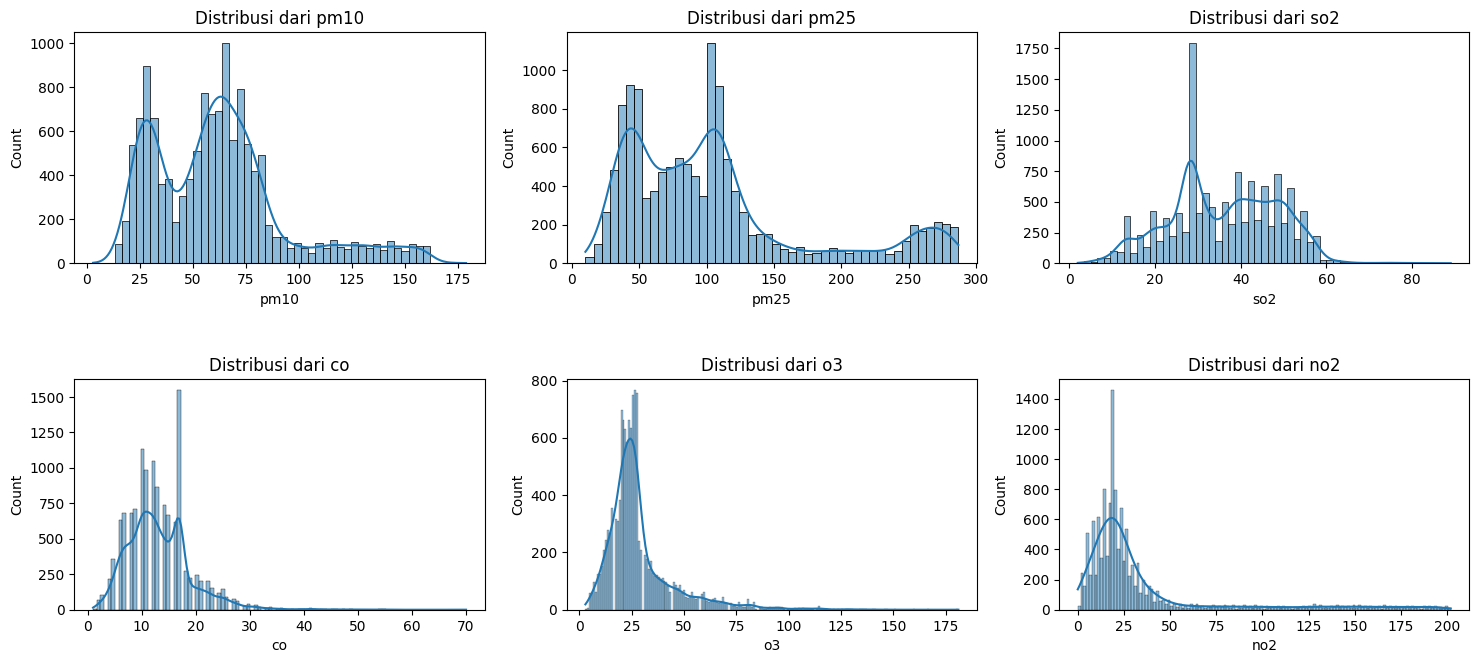

In [ ]:
# Distribusi
plt.figure(figsize=(18, 12))
plt.subplots_adjust(hspace=0.5)
for i, var in enumerate(X_resampled, 1):
    plt.subplot(3, 3, i)
    sns.histplot(X_resampled[var], kde=True)
    plt.title(f'Distribusi dari {var}')
plt.show()

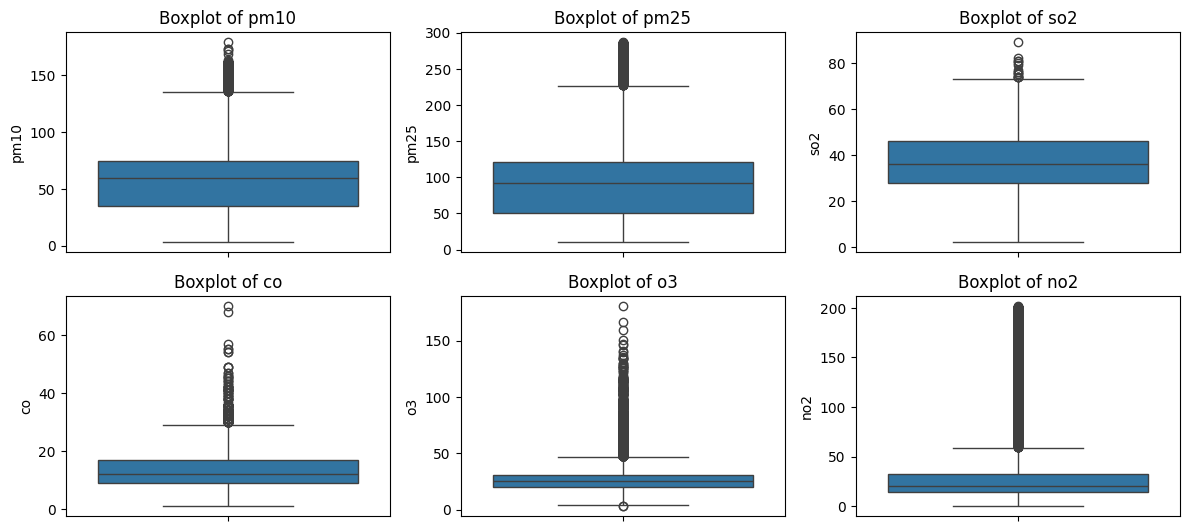

In [ ]:
# Boxplot
plt.figure(figsize=(12, 8))
for i, col in enumerate(X_resampled, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=X_resampled, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Membuat pipeline dengan preprocessing dan model SVM
pipelineknn = Pipeline([
    ('winsorizer', Winsorizer(capping_method='quantiles', tail='both', fold=0.05)),
    ('knn', KNeighborsClassifier())
])
# Training dan evaluasi untuk knn
pipelineknn.fit(X_train, y_train)
y_predknn = pipelineknn.predict(X_test)
print("KNN Classification Report:")
print(classification_report(y_test, y_predknn))
print(confusion_matrix(y_test, y_predknn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       593
           1       0.97      1.00      0.98       676
           2       1.00      0.95      0.97       693
           3       0.97      1.00      0.99       653

    accuracy                           0.99      2615
   macro avg       0.99      0.99      0.99      2615
weighted avg       0.99      0.99      0.98      2615

[[593   0   0   0]
 [  0 673   3   0]
 [  0  18 657  18]
 [  0   0   0 653]]


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scoresknn = cross_val_score(pipelineknn, X, y, cv=kfold, scoring='accuracy')

# Menampilkan skor rata-rata dan standar deviasi
print(scoresknn)
print(f"Skor rata-rata: {scoresknn.mean():.3f}")
print(f"Standar deviasi: {scoresknn.std():.3f}")

[0.95908544 0.9566787  0.96144578 0.96024096 0.9626506 ]
Skor rata-rata: 0.960
Standar deviasi: 0.002


In [ ]:
# Membuat pipeline dengan preprocessing dan model SVM
pipelinesvm = Pipeline([
    ('winsorizer', Winsorizer(capping_method='quantiles', tail='both', fold=0.05)),
    ('svm', SVC())
])
# Training dan evaluasi untuk svm
pipelinesvm.fit(X_train, y_train)
y_predsvm = pipelinesvm.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_predsvm))
print(confusion_matrix(y_test, y_predsvm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       593
           1       0.97      0.99      0.98       676
           2       0.99      0.89      0.94       693
           3       0.93      1.00      0.96       653

    accuracy                           0.97      2615
   macro avg       0.97      0.97      0.97      2615
weighted avg       0.97      0.97      0.97      2615

[[593   0   0   0]
 [  0 671   5   0]
 [  0  23 620  50]
 [  0   0   0 653]]


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scoressvm = cross_val_score(pipelinesvm, X, y, cv=kfold, scoring='accuracy')

# Menampilkan skor rata-rata dan standar deviasi
print(scoressvm)
print(f"Skor rata-rata: {scoressvm.mean():.3f}")
print(f"Standar deviasi: {scoressvm.std():.3f}")

[0.97596154 0.97596154 0.96626506 0.9686747  0.97590361 0.97590361
 0.96385542 0.97590361 0.96385542 0.97349398]
Skor rata-rata: 0.972
Standar deviasi: 0.005


# **Uji Data Baru**

In [ ]:
databaru = pd.read_csv('/content/databaru.csv')
databaru

,pm10,pm25,so2,co,o3,no2
0,28,33,17,13,16,24
1,21,18,15,13,20,6
2,45,52,25,10,15,16
3,54,68,23,12,33,14
4,66,95,51,16,14,14
5,40,70,52,12,21,17
6,63,113,39,19,25,19
7,60,99,35,23,50,20
8,72,111,54,32,22,61
9,88,243,27,19,22,21


In [ ]:
pipelineknn.predict(databaru)

array([3, 3, 3, 2, 2, 2, 1, 1, 1, 0, 0, 0])

In [ ]:
pipelinesvm.predict(databaru)

array([3, 3, 3, 2, 2, 2, 1, 1, 1, 0, 0, 0])

# **Save Model**

In [ ]:
import joblib

In [ ]:
#save model
model = 'model_AtmosAI.pkl'
joblib.dump(pipelinesvm, model)

['model_AtmosAI.pkl']